---

# DS400: Assignment IV (Python)

##### Lukas Schick (Student ID: 6291976)
##### January 26th, 2023

GitHub Repo: https://github.com/slukas99/DSPM_Assignment5

In [6]:
#import needed packages
import numpy as np
import pandas as pd
import requests
import time
from API_key_A5 import discoveryapi_key
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exercises 1-6

Set up GitHub repository and get Ticketmaster API key, not no coding needed.

# Exercise 7

In [7]:
#perform get request of ticketmaster site to get all venues in Germany
res = requests.get('https://app.ticketmaster.com/discovery/v2/venues?', 
             params = {"apikey" : discoveryapi_key,
                       "countryCode" : "DE",
                       "locale" : "*"}).json()

The resulting list gives information on the returned venues, a specific venue can be accessed by appending `_embedded`$venues[[x]] to the content object. In this way, information on a specific venue, like its name, address or city can be accessed. There is also additional information on the number of results per page, the number of pages, total results and the current page number and more.

## Exercise 8

In [8]:
#initialize empty df for total results
venues = pd.DataFrame({'name' : [],
                       'city' : [],
                       'postalCode' : [],
                       'address' : [],
                       'url' : [],
                       'longitude' : [],
                       'latitude' : []})

In [9]:
#for each result on the page, do the following
for i in range(0, res['page']['size']):
    #get name, city, postalCode etc. if they are available, otherwise use None
    try:
        name = res['_embedded']['venues'][i]['name']
    except:
        name = None
    try: 
        city = res['_embedded']['venues'][i]['city']['name']
    except:
        city = None
    try:
        postalCode = res['_embedded']['venues'][i]['postalCode']
    except:
        postalCode = None
    try:
        address = res['_embedded']['venues'][i]['address']['line1']
    except:
        address = None
    try:
        url = res['_embedded']['venues'][i]['url']
    except:
        url = None
    try:
        longitude = res['_embedded']['venues'][i]['location']['longitude']
    except:
        longitude = None
    try:
        latitude = res['_embedded']['venues'][i]['location']['latitude']
    except:
        latitude = None
    #append latest result to dataframe
    venues = venues.append({'name': name, 'city': city, 'postalCode': postalCode, 'address': address,
                       'url' : url, 'longitude' : longitude, 'latitude': latitude}, ignore_index=True)

In [10]:
venues

,name,city,postalCode,address,url,longitude,latitude
0,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
1,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
2,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.42138,52.486391
3,Zentrum am Park,Emmelshausen,56281,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.55656,50.15544
4,Stadthalle (Theatersaal),Mülheim,45479,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.87471,51.42778
5,Schlossgarten,Bruchsal,76646,Schloss Bruchsal,https://www.ticketmaster.de/venue/schlossgarte...,8.59908,49.12692
6,Stadthalle,Hockenheim,68766,Rathausstraße 3,https://www.ticketmaster.de/venue/stadthalle-h...,8.54908,49.31849
7,FZW,Dortmund,44263,Ritterstraße 20,https://www.ticketmaster.de/venue/fzw-dortmund...,7.4501,51.51481
8,Arena Trier,Trier,54292,Fort-Worth-Platz 1,https://www.ticketmaster.de/venue/arena-trier-...,6.66426,49.77183
9,Eissporthalle,Memmingen,87700,Hühnerbergstraße 19,https://www.ticketmaster.de/venue/eissporthall...,10.16293,47.97999


## Exercise 9

In [11]:
#perform get request of ticketmaster site to get all venues in Germany
res = requests.get('https://app.ticketmaster.com/discovery/v2/venues?', 
             params = {"apikey" : discoveryapi_key,
                       "countryCode" : "DE",
                       "locale" : "*",
                       "size" : 500}).json()

In [12]:
#compute total number of result pages
num_pages = res['page']['totalPages']

#initialize empty df for total results
venues = pd.DataFrame({'name' : [],
                       'city' : [],
                       'postalCode' : [],
                       'address' : [],
                       'url' : [],
                       'longitude' : [],
                       'latitude' : []})

In [13]:
#for every results page, do the following
for j in range(0,num_pages):
    
    #sleep for 1 second to relieve stress from site
    time.sleep(1)
    
    #perform get request of ticketmaster site to get all venues in Germany
    res = requests.get('https://app.ticketmaster.com/discovery/v2/venues?', 
             params = {"apikey" : discoveryapi_key,
                       "countryCode" : "DE",
                       "locale" : "*",
                       "size" : 500,
                       "page" : j}).json()
    
    
    #check if there are results on the page (sometimes due to connection errors, no results will show up)
    try:
        #for each result on the page, do the following
        for i in range(0, len(res['_embedded']['venues'])):
            #get name, city, postalCode etc. if they are available, otherwise use None
            try:
                name = res['_embedded']['venues'][i]['name']
            except:
                name = None
            try: 
                city = res['_embedded']['venues'][i]['city']['name']
            except:
                city = None
            try:
                postalCode = res['_embedded']['venues'][i]['postalCode']
            except:
                postalCode = None
            try:
                address = res['_embedded']['venues'][i]['address']['line1']
            except:
                address = None
            try:
                url = res['_embedded']['venues'][i]['url']
            except:
                url = None
            try:
                longitude = res['_embedded']['venues'][i]['location']['longitude']
            except:
                longitude = None
            try:
                latitude = res['_embedded']['venues'][i]['location']['latitude']
            except:
                latitude = None
            venues = venues.append({'name': name, 'city': city, 'postalCode': postalCode, 'address': address,
                               'url' : url, 'longitude' : longitude, 'latitude': latitude}, ignore_index=True)
    #if results for this page can't be loaded due to a connection error, pass
    except:
        pass

In [14]:
#print first ten results
venues.head(10)

,name,city,postalCode,address,url,longitude,latitude
0,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
1,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
2,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.42138,52.486391
3,Zentrum am Park,Emmelshausen,56281,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.55656,50.15544
4,Stadthalle (Theatersaal),Mülheim,45479,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.87471,51.42778
5,Schlossgarten,Bruchsal,76646,Schloss Bruchsal,https://www.ticketmaster.de/venue/schlossgarte...,8.59908,49.12692
6,Stadthalle,Hockenheim,68766,Rathausstraße 3,https://www.ticketmaster.de/venue/stadthalle-h...,8.54908,49.31849
7,FZW,Dortmund,44263,Ritterstraße 20,https://www.ticketmaster.de/venue/fzw-dortmund...,7.4501,51.51481
8,Arena Trier,Trier,54292,Fort-Worth-Platz 1,https://www.ticketmaster.de/venue/arena-trier-...,6.66426,49.77183
9,Eissporthalle,Memmingen,87700,Hühnerbergstraße 19,https://www.ticketmaster.de/venue/eissporthall...,10.16293,47.97999


In [15]:
#print shape
np.shape(venues)

(12934, 7)

## Exercises 10 + 11

In [16]:
#drop NAs from longitude and latitude data
longitude = pd.to_numeric(venues["longitude"].dropna())
latitude = pd.to_numeric(venues["latitude"].dropna())

In [17]:
#make sure to only use data within the specified country bounds
longitude = longitude.loc[lambda x : (x > 5.866) & (x < 15.042)]

In [22]:
latitude = latitude.loc[lambda x : (x > 47.270) & (x < 55.059)]

#make sure that only venues are included where both latitude and longitude are within the specified borders
latitude = latitude[latitude.index.isin(longitude.index)]
longitude = longitude[longitude.index.isin(latitude.index)]

<AxesSubplot:>

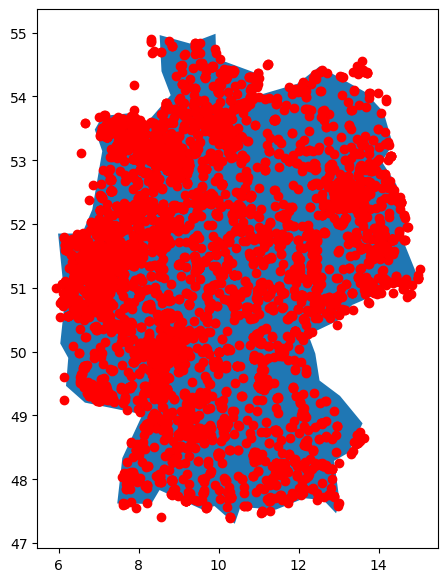

In [23]:
#plot the venues on a map of Germany
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(longitude, latitude, 'ro')
# get a base map of Germany
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) 
map = map[map.name == "Germany"]
# plot the map
map.plot(ax = ax)

## Exercise 12

In [25]:
#perform get request of ticketmaster site to get all venues in Switzerland
res = requests.get('https://app.ticketmaster.com/discovery/v2/venues?', 
             params = {"apikey" : discoveryapi_key,
                       "countryCode" : "CH",
                       "locale" : "*",
                       "size" : 500}).json()

In [26]:
#get total number of result pages
num_pages = res['page']['totalPages']

#initialize empty df for total results
venues = pd.DataFrame({'name' : [],
                       'city' : [],
                       'postalCode' : [],
                       'address' : [],
                       'url' : [],
                       'longitude' : [],
                       'latitude' : []})

In [28]:
#for every result page, do the following
for j in range(0,num_pages):
    
    #sleep for 1 second to relieve stress from site
    time.sleep(1)
    
    #perform get request of ticketmaster site to get all venues in Switzerland
    res = requests.get('https://app.ticketmaster.com/discovery/v2/venues?', 
             params = {"apikey" : discoveryapi_key,
                       "countryCode" : "CH",
                       "locale" : "*",
                       "size" : 500,
                       "page" : j}).json()
    
    
    #check if there are results on the page (sometimes due to connection errors, no results will show up)
    try:
        #for every result on the page, do the following
        for i in range(0, len(res['_embedded']['venues'])):
            #get name, city, postalCode etc. if they are available, otherwise use None
            try:
                name = res['_embedded']['venues'][i]['name']
            except:
                name = None
            try: 
                city = res['_embedded']['venues'][i]['city']['name']
            except:
                city = None
            try:
                postalCode = res['_embedded']['venues'][i]['postalCode']
            except:
                postalCode = None
            try:
                address = res['_embedded']['venues'][i]['address']['line1']
            except:
                address = None
            try:
                url = res['_embedded']['venues'][i]['url']
            except:
                url = None
            try:
                longitude = res['_embedded']['venues'][i]['location']['longitude']
            except:
                longitude = None
            try:
                latitude = res['_embedded']['venues'][i]['location']['latitude']
            except:
                latitude = None
                
            #append latest result to dataframe
            venues = venues.append({'name': name, 'city': city, 'postalCode': postalCode, 'address': address,
                               'url' : url, 'longitude' : longitude, 'latitude': latitude}, ignore_index=True)
    #if results for this page can't be loaded due to a connection error, pass
    except:
        pass

In [29]:
#print first ten results
venues.head(10)

,name,city,postalCode,address,url,longitude,latitude
0,Salle de l'Alhambra,Genève,1204,Rue de la Rôtisserie 10,https://www.ticketmaster.ch/venue/salle-de-lal...,6.14652,46.20272
1,Kulturfabrik KUFA Lyss,Lyss,3250,Werdtstrasse 17,https://www.ticketmaster.ch/venue/kulturfabrik...,7.29471,47.08075
2,Klostersaal Stans,Stans,6370,Mürgstrasse 18,https://www.ticketmaster.ch/venue/klostersaal-...,8.36912,46.95569
3,ILFISHALLE Langnau,Langnau im Emmental,3550,Güterstrasse 14,https://www.ticketmaster.ch/venue/ilfishalle-l...,7.78612,46.93628
4,Stadion Letzigrund,Zürich,8048,Badenerstrasse 500,https://www.ticketmaster.ch/venue/stadion-letz...,8.50377,47.38265
5,St Jakobshalle,Basel,4052,St. Jakobs-Strasse 390,https://www.ticketmaster.ch/venue/st-jakobshal...,7.61821,47.5404
6,Moods,Zürich,8005,Schiffbaustrasse 6,https://www.ticketmaster.ch/venue/moods-zurich...,8.51817,47.38994
7,AXA ARENA,Winterthur,8400,Grüzefeldstrasse 36,https://www.ticketmaster.ch/venue/axa-arena-wi...,8.74983,47.49438
8,Konzertfabrik Z7,Pratteln,4133,Kraftwerkstrasse 7,https://www.ticketmaster.ch/venue/konzertfabri...,7.69409,47.52748
9,Plaza,Zürich,8004,Badenerstrasse 109,https://www.ticketmaster.ch/venue/plaza-zurich...,8.52476,47.37419


In [30]:
#print shape
np.shape(venues)

(425, 7)

In [31]:
#drop NAs from latitude and longitude
longitude = pd.to_numeric(venues["longitude"].dropna())
latitude = pd.to_numeric(venues["latitude"].dropna())

In [32]:
#only keep values within the specified country bounds
latitude = latitude.loc[lambda x : (x > 45.818031) & (x < 47.808264)]

In [33]:
#check if some data still needs to be deleted according to the country bounds for longitude
longitude = longitude.loc[lambda x : (x > 5.956303) & (x < 10.491944)] 

#make sure that only venues are included where both latitude and longitude are within the specified borders
latitude = latitude[latitude.index.isin(longitude.index)]
longitude = longitude[longitude.index.isin(latitude.index)]

<AxesSubplot:>

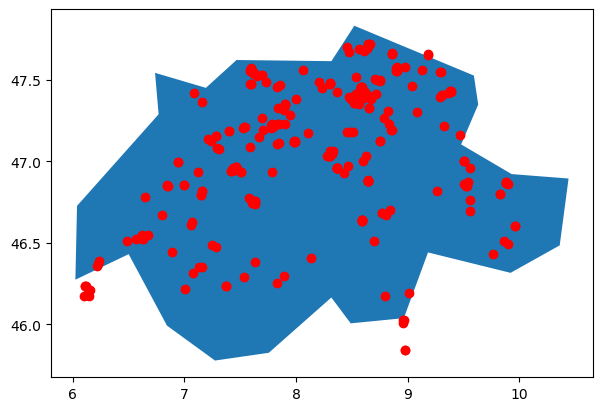

In [34]:
#plot the venues on a map of Switzerland
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(longitude, latitude, 'ro')
# get a base map of Switzerland
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) 
map = map[map.name == "Switzerland"]
# plot the map
map.plot(ax = ax)